# Importando bibliotecas

In [1]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn             as sns
import missingno           as msno
import numpy               as np

%matplotlib inline

pd.set_option('display.max_columns',500)

# Carregando dataset

In [2]:
df             = pd.read_excel('/ambiente/datasciece-dev/dataset-megasena/resultados.xlsx')
df.head()

,Concurso,Data Sorteio,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1.0,11/03/1996,41.0,5.0,4.0,52.0,30.0,33.0,0.0,0.0,NaN,NaN,0.00,17.0,39158.92,2016.0,330.21,SIM,1714650.23,0.0,0.0
1,2.0,18/03/1996,9.0,39.0,37.0,49.0,43.0,41.0,0.0,1.0,NaN,PR,2307162.23,65.0,14424.02,4488.0,208.91,NÃO,0.00,0.0,0.0
2,3.0,25/03/1996,36.0,30.0,10.0,11.0,29.0,47.0,0.0,2.0,NaN,RN,391192.51,62.0,10515.93,4261.0,153.01,NÃO,0.00,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,01/04/1996,6.0,59.0,42.0,27.0,1.0,5.0,0.0,0.0,NaN,NaN,0.00,39.0,15322.24,3311.0,180.48,SIM,717080.75,0.0,0.0


# Check dataset

In [3]:
df.shape

(2258, 21)

In [4]:
df.dtypes

Concurso                    float64
Data Sorteio                 object
primeira_dezena             float64
segunda_dezena              float64
terceira_dezena             float64
quarta_dezena               float64
quinta_dezena               float64
sexta_dezena                float64
Arrecadacao_Total           float64
Ganhadores_Sena             float64
Cidade                       object
UF                           object
Rateio_Sena                 float64
Ganhadores_Quina            float64
Rateio_Quina                float64
Ganhadores_Quadra           float64
Rateio_Quadra               float64
Acumulado                    object
Valor_Acumulado             float64
Estimativa_Prêmio           float64
Acumulado_Mega_da_Virada    float64
dtype: object

# Transformando dados

In [5]:
# Vamos criar uma coluna para armazenar a data e converte-la para datetime

df['data_sorteio_conv'] = df.iloc[:,1]
df.data_sorteio_conv = pd.to_datetime(df.data_sorteio_conv)

# Vamos quebrar a data em Dia, Mês e Ano
df['day']   = df.data_sorteio_conv.dt.day
df['month'] = df.data_sorteio_conv.dt.month 
df['year']  = df.data_sorteio_conv.dt.year

In [6]:
# Vamos criar um dataframe para analisar os sorteios que tiveram ganhadores

df_ganhadores = df[df['Acumulado'] == 'NÃO']

df_ganhadores.head()

,Concurso,Data Sorteio,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada,data_sorteio_conv,day,month,year
1,2.0,18/03/1996,9.0,39.0,37.0,49.0,43.0,41.0,0.0,1.0,NaN,PR,2307162.23,65.0,14424.02,4488.0,208.91,NÃO,0.0,0.0,0.0,1996-03-18,18.0,3.0,1996.0
2,3.0,25/03/1996,36.0,30.0,10.0,11.0,29.0,47.0,0.0,2.0,NaN,RN,391192.51,62.0,10515.93,4261.0,153.01,NÃO,0.0,0.0,0.0,1996-03-25,25.0,3.0,1996.0
11,11.0,20/05/1996,25.0,15.0,58.0,37.0,59.0,38.0,0.0,1.0,NaN,RJ,15591365.07,148.0,12706.05,9442.0,199.16,NÃO,0.0,0.0,0.0,1996-05-20,20.0,5.0,1996.0
17,17.0,01/07/1996,10.0,20.0,6.0,19.0,51.0,13.0,0.0,1.0,NaN,SP,6789869.08,144.0,7628.37,9376.0,117.16,NÃO,0.0,0.0,0.0,1996-01-07,7.0,1.0,1996.0
24,24.0,19/08/1996,1.0,8.0,14.0,28.0,33.0,43.0,0.0,1.0,NaN,NaN,18661679.61,227.0,7897.31,13486.0,132.93,NÃO,0.0,0.0,0.0,1996-08-19,19.0,8.0,1996.0


# Higienizando nosso dataset

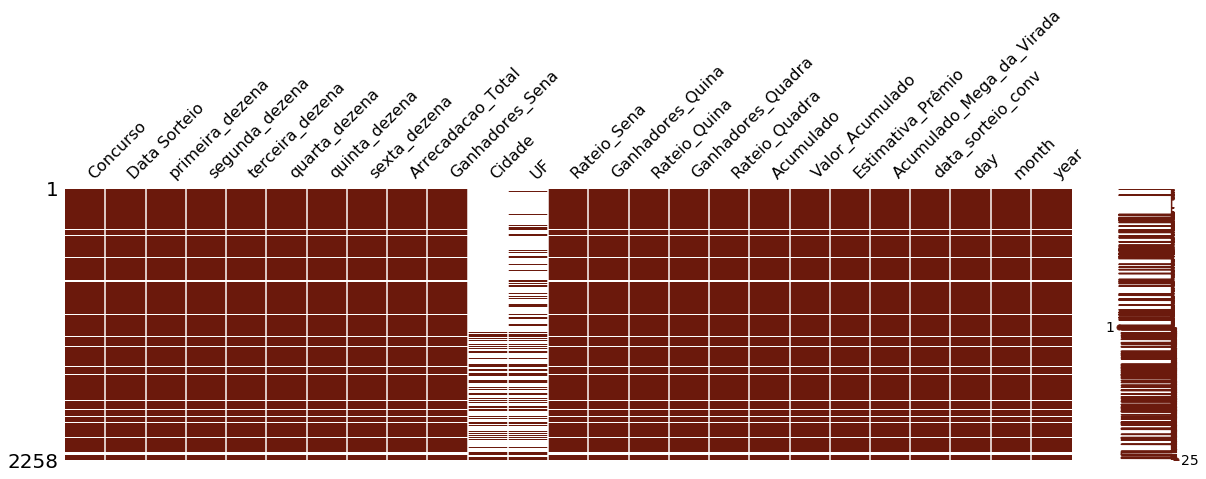

In [7]:
# Visão geral do dataframe
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

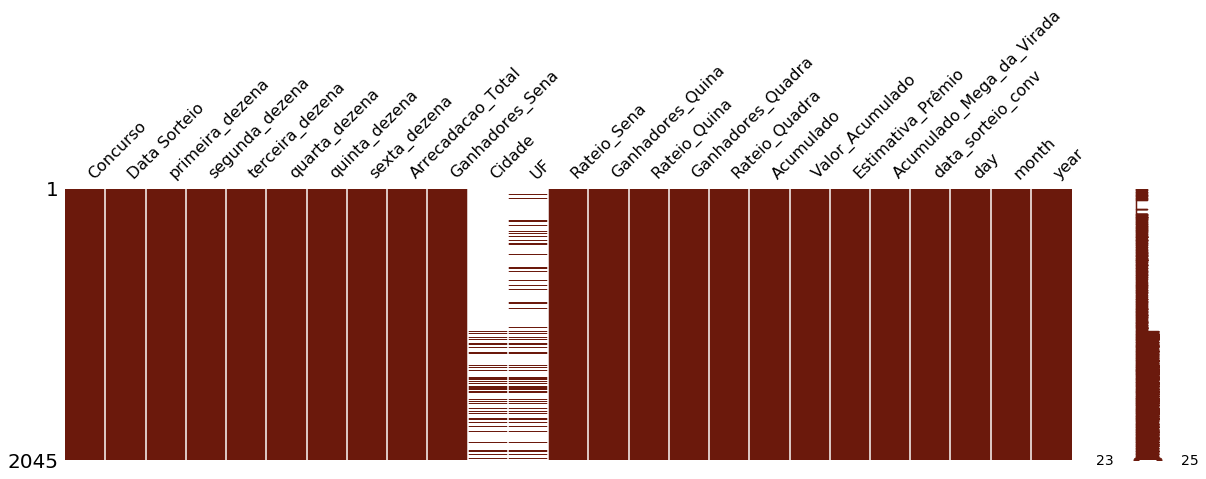

In [8]:
# Removendo valores nulos 
df = df.dropna(subset=['Concurso'])
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

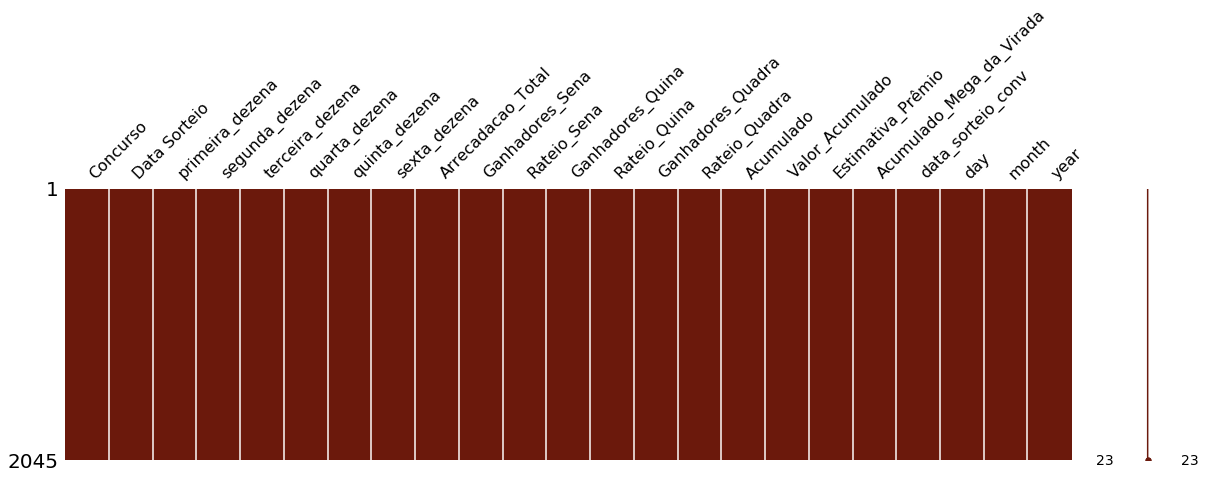

In [9]:
# Removendo colunas Cidade e UF
df = df.drop(['Cidade', 'UF'], axis=1)
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

# Exploratory Data Analysis

### Analisando sorteo com ganhadores

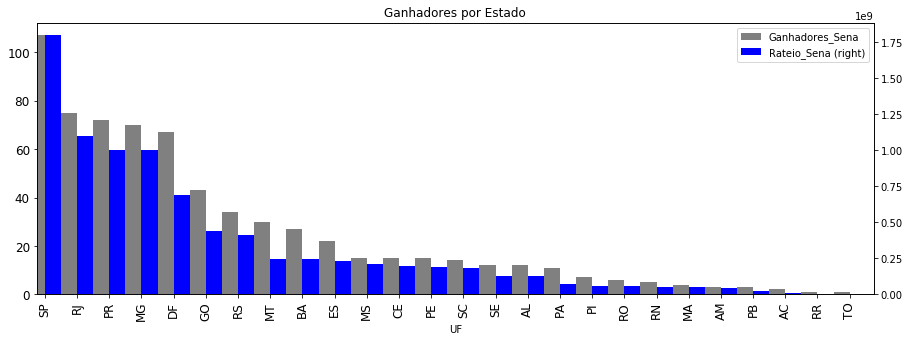

In [10]:
# Ganhadores X Volume do Prêmio por Estado 

ax = df_ganhadores.groupby(['UF'])['Ganhadores_Sena'].agg('sum').sort_values(ascending=False).plot(kind='bar', title='Ganhadores por Estado', figsize=(15,5), fontsize=12, legend=True, position=1, color='gray')

df_ganhadores.groupby(['UF'])['Rateio_Sena'].agg('sum').sort_values(ascending=False).plot(kind='bar', ax=ax, secondary_y=True, legend=True, position=0, color='blue')

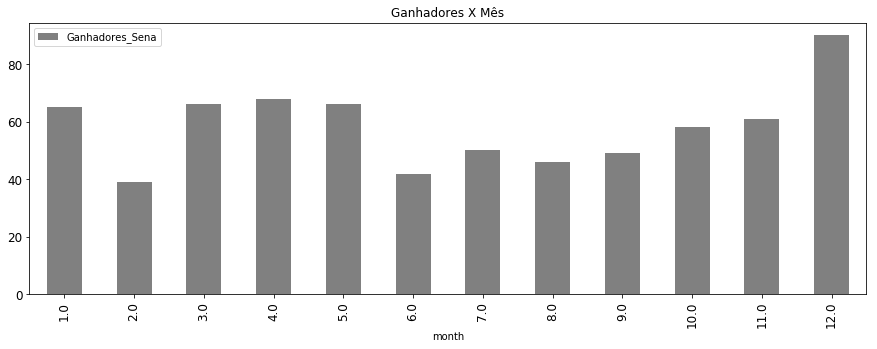

In [11]:
# Ganhadores X Mes

df_ganhadores.groupby(['month'])['Ganhadores_Sena'].agg('sum').plot(kind='bar', title='Ganhadores X Mês', fontsize=12, figsize=(15,5), legend=True, color='gray')

### Analisando dezenas sorteadas

In [12]:
# Verificando se alguma vez as dezenas se repetiram na mesma ordem

df.groupby(['primeira_dezena','segunda_dezena', 'terceira_dezena', 'quarta_dezena', 'quinta_dezena', 'sexta_dezena']).size().sort_values(ascending=False)

# Até agora nunca tivemos um jogo repetido com as dezenas na mesma ordem

primeira_dezena  segunda_dezena  terceira_dezena  quarta_dezena  quinta_dezena  sexta_dezena
60.0             58.0            49.0             32.0           20.0           34.0            1
21.0             28.0            19.0             25.0           50.0           43.0            1
20.0             58.0            10.0             59.0           57.0           5.0             1
                 59.0            19.0             54.0           15.0           8.0             1
                                 58.0             33.0           60.0           16.0            1
21.0             7.0             5.0              53.0           45.0           4.0             1
                 9.0             15.0             36.0           12.0           31.0            1
                 10.0            47.0             6.0            5.0            33.0            1
                 11.0            13.0             53.0           54.0           5.0             1
                         

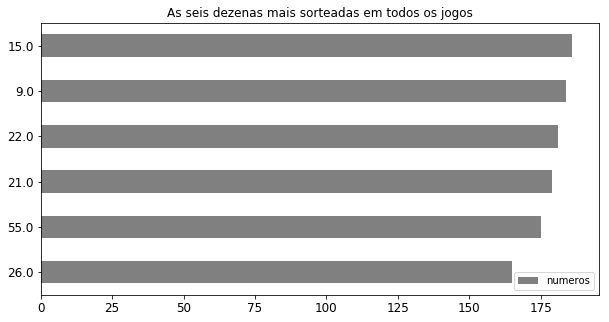

In [13]:
# As seis dezenas mais sorteadas em todos os jogos

dezenas = pd.DataFrame(df['primeira_dezena'].tolist() + df['segunda_dezena'].tolist() + df['terceira_dezena'].tolist() + df['quarta_dezena'].tolist() + df['quinta_dezena'].tolist() + df['sexta_dezena'].tolist(), columns=['numeros'])

dezenas['numeros'].value_counts().sort_values(ascending=True).head(6).plot(kind='barh', title='As seis dezenas mais sorteadas em todos os jogos', figsize=(10,5), fontsize=12, legend=True, color='gray')

# Preparando nosso dataset para o modelo

In [14]:
# Criando dataframe que vamos usar nos modelos 
df_nn = df[['primeira_dezena','segunda_dezena','terceira_dezena','quarta_dezena','quinta_dezena','sexta_dezena', 'Ganhadores_Sena']] 

# Deixando os nomes das coluna em minusculo
df_nn.columns = map(str.lower, df_nn.columns)

df_nn.head(5)

,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,ganhadores_sena
0,41.0,5.0,4.0,52.0,30.0,33.0,0.0
1,9.0,39.0,37.0,49.0,43.0,41.0,1.0
2,36.0,30.0,10.0,11.0,29.0,47.0,2.0
4,6.0,59.0,42.0,27.0,1.0,5.0,0.0
5,1.0,19.0,46.0,6.0,16.0,2.0,0.0


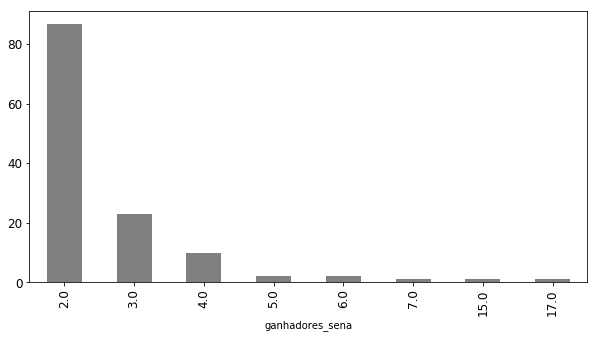

In [15]:
# Pode existir mais de um ganhador por jogo
df_nn[df_nn['ganhadores_sena'] > 1].groupby('ganhadores_sena')['ganhadores_sena'].agg('count').plot(kind='bar',figsize=(10,5), color='gray', fontsize=12)

/ambiente/python-dev/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/ambiente/python-dev/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


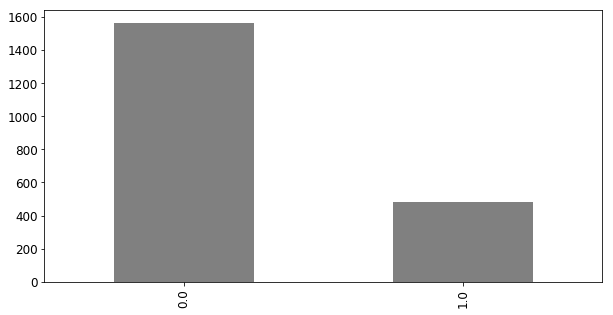

In [16]:
# Então tudo jogo que tiver mais de um ganhador deixamos como o numeor 1
df_nn.loc[df_nn['ganhadores_sena'] > 1, 'ganhadores_sena'] = 1

df_nn['ganhadores_sena'].value_counts().plot(kind='bar', figsize=(10,5), color='gray', fontsize=12)

# First Model - Neural Network

In [17]:
from keras.models  import Sequential
from keras.layers  import Dense
from sklearn.model_selection import train_test_split

/ambiente/python-dev/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
# Definição do seed para a reproducidade do modelo
np.random.seed(8)

In [19]:
# Separando target e classes
features = df_nn.iloc[:,0:6]
target   = df_nn.iloc[:,6]

In [20]:
# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [21]:
# Criando modelo
modelo = Sequential()
modelo.add(Dense(10, input_dim=6, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [22]:
# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Treinando modelo
modelo.fit(y_train, X_train, epochs=300, batch_size=10)

Epoch 1/300
1370/1370 [==============================] - 0s 276us/step - loss: 1.2306 - acc: 0.6854
Epoch 2/300
1370/1370 [==============================] - 0s 146us/step - loss: 0.7481 - acc: 0.7000
Epoch 3/300
1370/1370 [==============================] - 0s 163us/step - loss: 0.6376 - acc: 0.7409
Epoch 4/300
1370/1370 [==============================] - 0s 149us/step - loss: 0.5990 - acc: 0.7584
Epoch 5/300
1370/1370 [==============================] - 0s 137us/step - loss: 0.5700 - acc: 0.7723
Epoch 6/300
1370/1370 [==============================] - 0s 131us/step - loss: 0.5605 - acc: 0.7664
Epoch 7/300
1370/1370 [==============================] - 0s 145us/step - loss: 0.5518 - acc: 0.7635
Epoch 8/300
1370/1370 [==============================] - 0s 142us/step - loss: 0.5443 - acc: 0.7664
Epoch 9/300
1370/1370 [==============================] - 0s 148us/step - loss: 0.5377 - acc: 0.7759
Epoch 10/300
1370/1370 [==============================] - 0s 144us/step - loss: 0.5505 - acc: 0.7650

1370/1370 [==============================] - 0s 161us/step - loss: 0.5115 - acc: 0.7825
Epoch 83/300
1370/1370 [==============================] - 0s 133us/step - loss: 0.5150 - acc: 0.7839
Epoch 84/300
1370/1370 [==============================] - 0s 145us/step - loss: 0.5194 - acc: 0.7861
Epoch 85/300
1370/1370 [==============================] - 0s 140us/step - loss: 0.5115 - acc: 0.7832
Epoch 86/300
1370/1370 [==============================] - 0s 133us/step - loss: 0.5159 - acc: 0.7825
Epoch 87/300
1370/1370 [==============================] - 0s 146us/step - loss: 0.5098 - acc: 0.7796
Epoch 88/300
1370/1370 [==============================] - 0s 148us/step - loss: 0.5099 - acc: 0.7818
Epoch 89/300
1370/1370 [==============================] - 0s 138us/step - loss: 0.5081 - acc: 0.7847
Epoch 90/300
1370/1370 [==============================] - 0s 139us/step - loss: 0.5111 - acc: 0.7803
Epoch 91/300
1370/1370 [==============================] - 0s 136us/step - loss: 0.5121 - acc: 0.7839
Epo

1370/1370 [==============================] - 0s 141us/step - loss: 0.5011 - acc: 0.7876
Epoch 163/300
1370/1370 [==============================] - 0s 133us/step - loss: 0.5049 - acc: 0.7854
Epoch 164/300
1370/1370 [==============================] - 0s 137us/step - loss: 0.5114 - acc: 0.7861
Epoch 165/300
1370/1370 [==============================] - 0s 137us/step - loss: 0.5068 - acc: 0.7861
Epoch 166/300
1370/1370 [==============================] - 0s 159us/step - loss: 0.5067 - acc: 0.7876
Epoch 167/300
1370/1370 [==============================] - 0s 131us/step - loss: 0.5034 - acc: 0.7891
Epoch 168/300
1370/1370 [==============================] - 0s 129us/step - loss: 0.5032 - acc: 0.7854
Epoch 169/300
1370/1370 [==============================] - 0s 137us/step - loss: 0.5064 - acc: 0.7847
Epoch 170/300
1370/1370 [==============================] - 0s 131us/step - loss: 0.5027 - acc: 0.7876
Epoch 171/300
1370/1370 [==============================] - 0s 134us/step - loss: 0.5027 - acc: 0

1370/1370 [==============================] - 0s 144us/step - loss: 0.4957 - acc: 0.7898
Epoch 243/300
1370/1370 [==============================] - 0s 142us/step - loss: 0.4966 - acc: 0.7905
Epoch 244/300
1370/1370 [==============================] - 0s 140us/step - loss: 0.4965 - acc: 0.7891
Epoch 245/300
1370/1370 [==============================] - 0s 136us/step - loss: 0.4982 - acc: 0.7891
Epoch 246/300
1370/1370 [==============================] - 0s 133us/step - loss: 0.4961 - acc: 0.7898
Epoch 247/300
1370/1370 [==============================] - 0s 144us/step - loss: 0.4970 - acc: 0.7898
Epoch 248/300
1370/1370 [==============================] - 0s 141us/step - loss: 0.4938 - acc: 0.7891
Epoch 249/300
1370/1370 [==============================] - 0s 141us/step - loss: 0.4977 - acc: 0.7949
Epoch 250/300
1370/1370 [==============================] - 0s 145us/step - loss: 0.4958 - acc: 0.7905
Epoch 251/300
1370/1370 [==============================] - 0s 148us/step - loss: 0.4967 - acc: 0

# Validando Modelo

In [24]:
# Avaliando modelo
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acurracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

675/675 [==============================] - 0s 66us/step


Acurracia do modelo

acc: 74.222222%


# Predict 

In [25]:
#numero_sorteio = [[3,6,11,27,28,46]]

numero_sorteio = [[7, 14, 47, 54,56, 60]]

y_predict = pd.DataFrame(numero_sorteio)
y_predict

,0,1,2,3,4,5
0,7,14,47,54,56,60


In [26]:
# Fazendo a predição - Classes
predict_class = modelo.predict_classes(y_predict)
print("1 = Tem chance de ganhar / 0 = Não tem chance de ganhar")
print("\n")
print("Previsão Modelo: ",predict_class[0][0])

1 = Tem chance de ganhar / 0 = Não tem chance de ganhar


Previsão Modelo:  0


In [27]:
# Achando a probabilidade - Proba
predict_proba = modelo.predict_proba(y_predict)
print("Qual a probabilidade do número sair?")
print("\n")
print("Probabilidade: ", round((predict_proba[0][0]*100),2), "%")

Qual a probabilidade do número sair?


Probabilidade:  25.04 %


# Gerando numero Mega Sena

In [28]:
import random

In [29]:
random.seed(60)

In [55]:
probabilidade_boa   = 99
probabilidade_atual = 0

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[['primeira_dezena','segunda_dezena', 'terceira_dezena', 'quarta_dezena', 'quinta_dezena', 'sexta_dezena']].values.tolist()

# Gera sequencia de numeros até que a probabilidade seja maior ou igual que 99%
while(probabilidade_atual < probabilidade_boa):
    
    # Gera sequencia de número 
    dezenas_megasena = random.sample(range(1, 60), 6)
    
    # Numero gerado já foi sorteado?
    if not dezenas_megasena in dezenas_sorteadas:

        # Valida qual a probabilidade da seguência ser sorteada
        probabilidade_atual = int(modelo.predict_proba(pd.DataFrame([dezenas_megasena]))[0][0]*100)
    

print("Probabilidade de {0} % -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_megasena)))   

Probabilidade de 99 % -> Dezenas: [3, 7, 15, 21, 24, 59]
